# Homework 7: Dimension Reduction

## The total score for this assignment will be 100 points, consisting of:
- 10 pt: Overall quality of spelling, grammar, puctuation, etc. of written sentences.
- 10 pt: Codes are written in [PEP 8](https://www.python.org/dev/peps/pep-0008/) style.
- 80 pt: Homework questions. 

In [1]:
MY_UNIQNAME = 'yuqin'

# Download the data:
For this assignment, we will be using a gene expression dataset by Golub et al. (1999).

https://www.kaggle.com/crawford/gene-expression

>This dataset comes from a proof-of-concept study published in 1999 by Golub et al. It showed how new cases of cancer could be classified by gene expression monitoring (via DNA microarray) and thereby provided a general approach for identifying new cancer classes and assigning tumors to known classes. These data were used to classify patients with acute myeloid leukemia (AML) and acute lymphoblastic leukemia (ALL).

A Kaggle user has [shared a kernel using PCA on this dataset](https://www.kaggle.com/kanav0183/pca-analysis-for-geneclassification), which, among others, you're free to use as a reference.

# Part 0: Loading the Data

As usual, load the data and use the summary functions and plots of your choice to get a sense of the data.

In [2]:
import pandas as pd
import numpy as np
import sklearn.manifold as skm
import sklearn.decomposition as skd
import sklearn.cluster as skc
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings('ignore')
sns.set_context("notebook")  # make figures fit

In [4]:
# feel free to change the file location 
df_train = pd.read_csv("./data/data_set_ALL_AML_train.csv")
df_test = pd.read_csv("./data/data_set_ALL_AML_independent.csv")
df_label = pd.read_csv("./data/actual.csv")

In [5]:
df_train = df_train[[col for col in df_train.columns if "call" not in col]].T
df_test = df_test[[col for col in df_test.columns if "call" not in col]].T

In [6]:
[df_train.shape, df_test.shape]

[(40, 7129), (36, 7129)]

In [7]:
df_train.index

Index(['Gene Description', 'Gene Accession Number', '1', '2', '3', '4', '5',
       '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17',
       '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '34', '35',
       '36', '37', '38', '28', '29', '30', '31', '32', '33'],
      dtype='object')

In [8]:
df_test.index

Index(['Gene Description', 'Gene Accession Number', '39', '40', '42', '47',
       '48', '49', '41', '43', '44', '45', '46', '70', '71', '72', '68', '69',
       '67', '55', '56', '59', '52', '53', '51', '50', '54', '57', '58', '60',
       '61', '65', '66', '63', '64', '62'],
      dtype='object')

In [9]:
df_train.head()

,0,1,2,3,4,5,6,7,8,9,...,7119,7120,7121,7122,7123,7124,7125,7126,7127,7128
Gene Description,AFFX-BioB-5_at (endogenous control),AFFX-BioB-M_at (endogenous control),AFFX-BioB-3_at (endogenous control),AFFX-BioC-5_at (endogenous control),AFFX-BioC-3_at (endogenous control),AFFX-BioDn-5_at (endogenous control),AFFX-BioDn-3_at (endogenous control),AFFX-CreX-5_at (endogenous control),AFFX-CreX-3_at (endogenous control),AFFX-BioB-5_st (endogenous control),...,Transcription factor Stat5b (stat5b) mRNA,Breast epithelial antigen BA46 mRNA,GB DEF = Calcium/calmodulin-dependent protein ...,TUBULIN ALPHA-4 CHAIN,CYP4B1 Cytochrome P450; subfamily IVB; polypep...,PTGER3 Prostaglandin E receptor 3 (subtype EP3...,HMG2 High-mobility group (nonhistone chromosom...,RB1 Retinoblastoma 1 (including osteosarcoma),GB DEF = Glycophorin Sta (type A) exons 3 and ...,GB DEF = mRNA (clone 1A7)
Gene Accession Number,AFFX-BioB-5_at,AFFX-BioB-M_at,AFFX-BioB-3_at,AFFX-BioC-5_at,AFFX-BioC-3_at,AFFX-BioDn-5_at,AFFX-BioDn-3_at,AFFX-CreX-5_at,AFFX-CreX-3_at,AFFX-BioB-5_st,...,U48730_at,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
1,-214,-153,-58,88,-295,-558,199,-176,252,206,...,185,511,-125,389,-37,793,329,36,191,-37
2,-139,-73,-1,283,-264,-400,-330,-168,101,74,...,169,837,-36,442,-17,782,295,11,76,-14
3,-76,-49,-307,309,-376,-650,33,-367,206,-215,...,315,1199,33,168,52,1138,777,41,228,-41


In [10]:
len(df_train.T["Gene Accession Number"].unique())

7129

In [11]:
df_test.head()

,0,1,2,3,4,5,6,7,8,9,...,7119,7120,7121,7122,7123,7124,7125,7126,7127,7128
Gene Description,AFFX-BioB-5_at (endogenous control),AFFX-BioB-M_at (endogenous control),AFFX-BioB-3_at (endogenous control),AFFX-BioC-5_at (endogenous control),AFFX-BioC-3_at (endogenous control),AFFX-BioDn-5_at (endogenous control),AFFX-BioDn-3_at (endogenous control),AFFX-CreX-5_at (endogenous control),AFFX-CreX-3_at (endogenous control),AFFX-BioB-5_st (endogenous control),...,Transcription factor Stat5b (stat5b) mRNA,Breast epithelial antigen BA46 mRNA,GB DEF = Calcium/calmodulin-dependent protein ...,TUBULIN ALPHA-4 CHAIN,CYP4B1 Cytochrome P450; subfamily IVB; polypep...,PTGER3 Prostaglandin E receptor 3 (subtype EP3...,HMG2 High-mobility group (nonhistone chromosom...,RB1 Retinoblastoma 1 (including osteosarcoma),GB DEF = Glycophorin Sta (type A) exons 3 and ...,GB DEF = mRNA (clone 1A7)
Gene Accession Number,AFFX-BioB-5_at,AFFX-BioB-M_at,AFFX-BioB-3_at,AFFX-BioC-5_at,AFFX-BioC-3_at,AFFX-BioDn-5_at,AFFX-BioDn-3_at,AFFX-CreX-5_at,AFFX-CreX-3_at,AFFX-BioB-5_st,...,U48730_at,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
39,-342,-200,41,328,-224,-427,-656,-292,137,-144,...,277,1023,67,214,-135,1074,475,48,168,-70
40,-87,-248,262,295,-226,-493,367,-452,194,162,...,83,529,-295,352,-67,67,263,-33,-33,-21
42,22,-153,17,276,-211,-250,55,-141,0,500,...,413,399,16,558,24,893,297,6,1971,-42


In [12]:
df_test = df_test.drop(['Gene Description','Gene Accession Number'],axis=0)

In [13]:
df_train = df_train.drop(['Gene Description','Gene Accession Number'],axis=0)

In [33]:
df_train.head()

,0,1,2,3,4,5,6,7,8,9,...,7119,7120,7121,7122,7123,7124,7125,7126,7127,7128
1,-214,-153,-58,88,-295,-558,199,-176,252,206,...,185,511,-125,389,-37,793,329,36,191,-37
2,-139,-73,-1,283,-264,-400,-330,-168,101,74,...,169,837,-36,442,-17,782,295,11,76,-14
3,-76,-49,-307,309,-376,-650,33,-367,206,-215,...,315,1199,33,168,52,1138,777,41,228,-41
4,-135,-114,265,12,-419,-585,158,-253,49,31,...,240,835,218,174,-110,627,170,-50,126,-91
5,-106,-125,-76,168,-230,-284,4,-122,70,252,...,156,649,57,504,-26,250,314,14,56,-25


In [99]:
df_label.head(2)

,patient,cancer
0,1,ALL
1,2,ALL


# Part 1: MDS

## 1.1. Visualize the gene expression data in 2D or 3D using Multidimensional Scaling  (10 pts.)

In [14]:
### YOUR CODE HERE ###
# same scaler different functions
    # from sklearn.preprocessing import StandardScaler
    # df_train_norm_1 = df_train.copy()
    # X_std = StandardScaler().fit_transform(df_train_norm_1)
import sklearn.preprocessing as skp
df_train_norm = df_train.copy()
df_train_norm.ix[:,:] = skp.scale(df_train_norm.ix[:,:].astype(np.float))
df_train_norm.head()

,0,1,2,3,4,5,6,7,8,9,...,7119,7120,7121,7122,7123,7124,7125,7126,7127,7128
1,-0.861496,-0.033101,-0.351701,-0.805738,-0.168417,-0.888716,1.120068,0.280962,1.863470,0.449110,...,0.074511,-0.815620,-1.758717,-0.021865,-0.405584,-0.159782,-0.033046,0.546068,-0.435820,-0.255875
2,-0.167723,1.037400,0.139139,0.876572,0.114600,0.293351,-1.322502,0.370212,0.023726,-0.182439,...,-0.116640,0.292993,-0.589006,0.092516,0.073055,-0.182892,-0.197260,-0.267043,-0.595744,0.499648
3,0.415047,1.358550,-2.495899,1.100880,-0.907912,-1.577008,0.353591,-1.849884,1.303018,-1.565148,...,1.627617,1.524030,0.317849,-0.498816,1.724361,0.565043,2.130709,0.708690,-0.384366,-0.387270
4,-0.130721,0.488768,2.429729,-1.461407,-1.300484,-1.090715,0.930757,-0.578070,-0.609828,-0.388171,...,0.731595,0.286192,2.749271,-0.485868,-2.152617,-0.508538,-0.800986,-2.251033,-0.526212,-2.029712
5,0.137537,0.341574,-0.506703,-0.115559,0.425006,1.161198,0.219688,0.883400,-0.353970,0.669195,...,-0.271951,-0.346330,0.633277,0.226322,-0.142332,-1.300593,-0.105493,-0.169469,-0.623557,0.138311


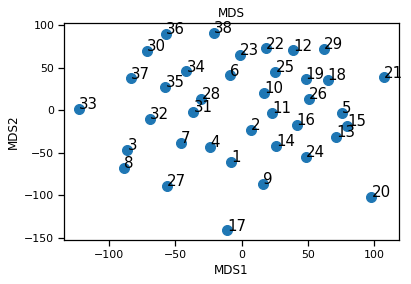

In [15]:
# 2D 
MDS_2D = skm.MDS(n_components=2).fit_transform(df_train_norm.ix[:,:])
plt.scatter(MDS_2D[:,0],MDS_2D[:,1],s=100)

plt.xlabel('MDS1')
plt.ylabel('MDS2')
plt.title('MDS')

# annote
for i, s in enumerate(df_train_norm.index):
    plt.annotate(s, xy=MDS_2D[i,:2]+0.05, fontsize=15)

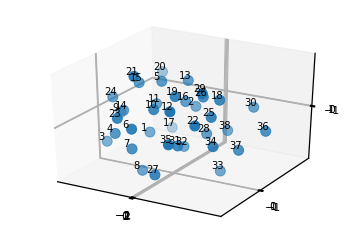

In [123]:
# 3D 
MDS_3D = skm.MDS(n_components=3).fit_transform(df_train_norm.ix[:,:])

from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(MDS_3D[:,0], MDS_3D[:,1], MDS_3D[:,2], s=100)

ax.set_xticks([-2,-1,0,1,2])
ax.set_yticks([-1,0,1])
ax.set_zticks([-1,0,1])

for i, s in enumerate(df_train_norm.index):
    x, y, _ = proj3d.proj_transform(MDS_3D[i,0],MDS_3D[i,1],MDS_3D[i,2],
                                    ax.get_proj())
    plt.annotate(s, xy=(x-0.005,y+0.002), fontsize=10)

In [128]:
# acute myeloid leukemia (AML) and acute lymphoblastic leukemia (ALL)
# df_label.ix[:37,:]

## 1.2. Interprete your results (10 pts.)
What can you see from your visualization(s)?

(YOUR INTERPRETATION HERE)
### Explain:
MDS display the data in low-dimensional while preserving the distances in the high-dimensional space. From the above two plots, we can find some structure of the data. 
* In the 2D scatterplot, there are some potential linear relationships between some subjects. 
![](structure_of_data.png)

* In the 3D scatterplot, we can recognize some small groups and also potential linear relations.

![](group.png)
* We can easily find some outliners from the two plots too like subject 20, 17, 33, 36 and 27.
* From the actual data, I found that the category of cancer for the patient whose number is larger than 27 is "AML" while smaller than 27 is "ALL". I circled the "AML" patients with red, from which we can find that these patients tend to located at the right side of the plot, where the value of MDS1 is lower than 0. This indicates that patients with same cancer tend to have some gene expressions in common. And there are some gene factors behind the MDS1 that lead to the occurrence of different kinds of cancers.

# Part 2: PCA

## 2.1. Perform a Principal Component Analysis of the genes in your dataset (10 pts.)

In [16]:
### YOUR CODE HERE ###
pca_model = skd.PCA().fit(df_train_norm.ix[:,:])
pca_model.components_.shape

(38, 7129)

## 2.2. How much of the variance does each component explain? (2 pts.)

In [17]:
### YOUR CODE HERE ###
pca_model.explained_variance_

array([1.09735759e+03, 8.76976485e+02, 4.83272186e+02, 3.57658145e+02,
       3.39170426e+02, 2.72510227e+02, 2.55597771e+02, 2.40859971e+02,
       2.18576598e+02, 1.93681882e+02, 1.83741623e+02, 1.72634428e+02,
       1.61466953e+02, 1.52866654e+02, 1.42171050e+02, 1.38629132e+02,
       1.35241393e+02, 1.25441555e+02, 1.24851480e+02, 1.20423734e+02,
       1.12430908e+02, 1.11931494e+02, 1.06610477e+02, 1.04779826e+02,
       1.03617441e+02, 1.00934278e+02, 9.86526997e+01, 9.56118071e+01,
       9.54129156e+01, 9.14541425e+01, 8.49250449e+01, 8.17690665e+01,
       7.56789591e+01, 7.30684864e+01, 6.76502725e+01, 6.28995436e+01,
       6.11190279e+01, 2.16415626e-28])

(YOUR INTERPRETATION HERE)
I extracted 38 components from the data. The interesting thing is that every component has explained larger than one variance. Thus, It's hard to determine the number of principal components to retain by dropping those principal components whose explained variance is smaller than 1. So I think I'd better use Screen Plot to help me make this decision.

## 2.3. What would be an appropriate number of components to keep? Why? (2 pts.)

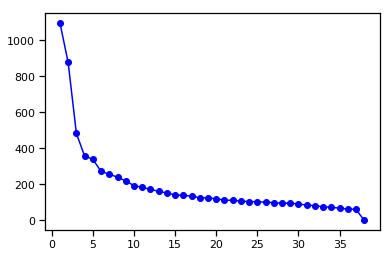

In [57]:
### YOUR CODE HERE ###
# screen plot
plt.plot(range(1,39),pca_model.explained_variance_,'b-o')

(YOUR INTERPRETATION HERE)From this scree plot, we can tell the "elbow" point is happening at PC4. Combined with the result of explained variance, I decided to keep three or four principle components. 

## 2.4 Visualize your data in the reduced component space. What can you see from the visualization? (6 pts.)

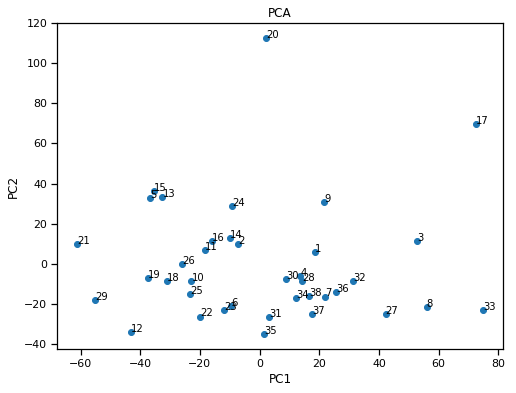

In [18]:
### YOUR CODE HERE ###
# biplot
# Scatterplot of disaggregated data
from sklearn.decomposition import PCA as sklearnPCA
pca = sklearnPCA(n_components=2)
X_reduced  = pca.fit_transform(df_train_norm.ix[:,:])
plt.figure(figsize=(8,6))
plt.scatter(X_reduced[:,0], X_reduced[:,1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA')
# plt.ylim(-4, 6)

for i, s in enumerate(df_train_norm.index):
    plt.annotate(s, xy=X_reduced[i,:2]+0.05, fontsize=10)

<Figure size 432x288 with 0 Axes>

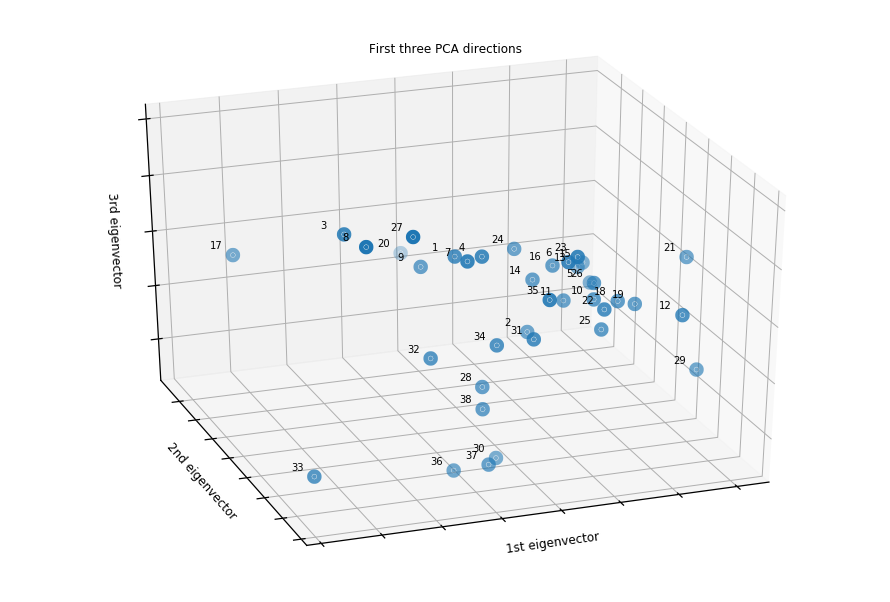

In [171]:
from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca = sklearnPCA(n_components=3)
X_reduced_3  = sklearn_pca.fit_transform(df_train_norm.ix[:,:])
from mpl_toolkits.mplot3d import Axes3D
plt.clf()
fig = plt.figure(2, figsize=(12,8 ))
ax = Axes3D(fig, elev=-150, azim=110,)
ax.scatter(X_reduced_3[:, 0], X_reduced_3[:, 1], X_reduced_3[:, 2],cmap=plt.cm.Paired,linewidths=10)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

for i, s in enumerate(df_train_norm.index):
    x, y, _ = proj3d.proj_transform(X_reduced_3[i,0],X_reduced_3[i,1],X_reduced_3[i,2],
                                    ax.get_proj())
    plt.annotate(s, xy=(x-0.005,y+0.002), fontsize=10)

(YOUR INTERPRETATION HERE)
(YOUR INTERPRETATION HERE)
### Explain:

* I marked the "AML" patient with orange dots while blue dots represent the "ALL" patients. 
* When the principle components are two, I find the AML patients all have lower PC2, more specific, lower than 0. And their PC1 values tend to be center around 0 to 40. However, I find two components can't represent the data very well; for "ALL" patients, their distribution is kind of messy.
* Thus, I tried out three PCs to plot the data, and the result is much better. I can tell a relatively clear boundray between "ALL" patients and "AML" patients.


![](pca2_pca3.png)

# Part 3: Exploratory Factor Analysis

## 3.1. Create factor model with two factors and compare it to your PCA results. What are the similarities and differences? (10 pts.)

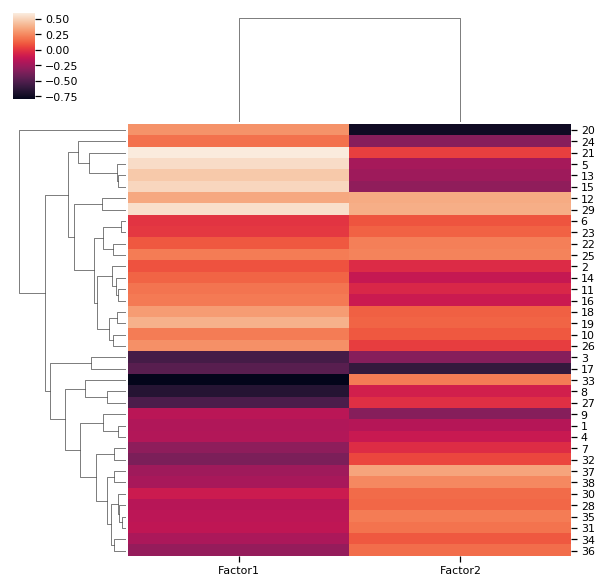

In [19]:
### YOUR CODE HERE ###
# build a 2-factor model
fa_model = skd.FactorAnalysis(n_components=2).fit(df_train_norm.ix[:,:].T)
fa_model.components_
# Show the loadings
df_loadings = pd.DataFrame(fa_model.components_.T, 
             index=df_train_norm.index,
             columns=['Factor1', 'Factor2'])
# # Visualize the factor loading matrix
sns.clustermap(df_loadings)

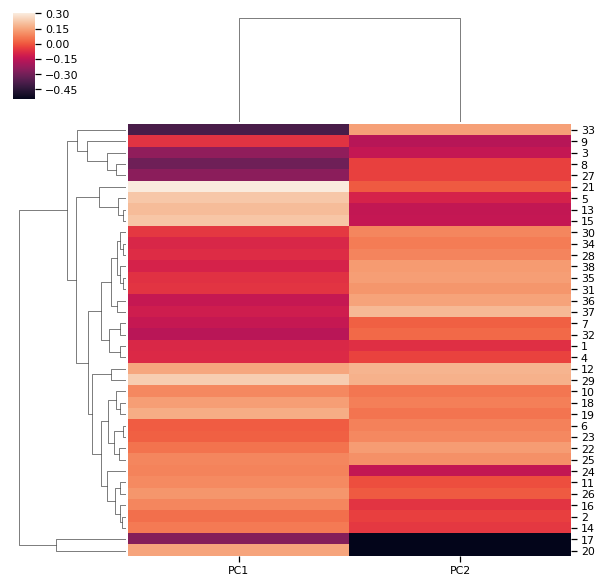

In [20]:
# Show the principcal components
X_pca_2 = skd.PCA(n_components=2).fit(df_train_norm.ix[:,:].T)
pca_components = pd.DataFrame(X_pca_2.components_.T, 
             index=df_train_norm.index,
             columns=['PC1', 'PC2'])
sns.clustermap(pca_components)

In [196]:
df_loadings["PC1"] = pca_components["PC1"]
df_loadings["PC2"] = pca_components["PC2"]
df_loadings

,Factor1,Factor2,PC1,PC2
1,-0.189215,-0.173996,-0.080787,-0.064332
2,0.094481,-0.025506,0.049304,-0.034850
3,-0.546776,-0.327748,-0.237648,-0.134980
4,-0.182471,-0.106207,-0.078647,-0.028138
5,0.540016,-0.220358,0.226816,-0.094986
6,0.007055,0.099727,0.013630,0.083380
7,-0.299340,-0.022780,-0.130376,0.020757
8,-0.658147,-0.074445,-0.306229,-0.030491
9,-0.155293,-0.324195,-0.057068,-0.162061
10,0.211440,0.112512,0.096438,0.060901


(YOUR INTERPRETATION HERE)
### Explain:
* From the above dataframe we can tell, for each patient, the loadings are similar with the PCA's values.
* Comparing two cluster heatmap, we can find the similariteis of the results of two methods. It seems like that:
    * Factor1 show high correlation loadings with 3,17,33,8,27 while PC1 shows similar relationships with these patients. 
    * Factor2 is highly related with patient 17, 20 while PC2 has same correlation with these two subjects.
* Even though the general distribution of similarities seems similar, we can't tell any meaningful patterns from these two results.

![](pca_vs_fa.png)

## 3.2. Create another factor model with an additional factor and compare it to the first. What might the factors represent? (10 pts.)

In [200]:
### YOUR CODE HERE ###
# build a 3-factor model
fa_model_3 = skd.FactorAnalysis(n_components=3).fit(df_train_norm.ix[:,:].T)

# Show the loadings
df_loadings_3 = pd.DataFrame(fa_model_3.components_.T, 
             index=df_train_norm.index,
             columns=['Factor1', 'Factor2', 'Factor3'])
# # Visualize the factor loading matrix
# sns.clustermap(df_loadings_3)

(YOUR INTERPRETATION HERE)
### Explain:
* Let's have a look at the following two plots, where are the cluster heatmap.
* Generally, no matter it is a two-factors model or three-factors model, there are one subject - 17 is highly correlated with all these factors. So I made an assumption that the subejct 17 contains some genes that are related with "cancer"，no matter it is AML or ALL.
* In the two-factor model, we can tell the AML patients are highly related with Factor1 while in the three-factors model, Factor1 and Factor3 strongly influence them. 
* I also notice that subject 20 is highly related with Factor2 in two-factor model while strongly influenced by Factor 2 and 3 in the three-factors model. And combined with the overall distribution of color. I guess that Factor 2 in three-factors model may be correlated with ALL patient. 
* Another interesting thing is that I found subjects 3, 17, and 8 (they are all "ALL" patients) are highly correlated with Factor1 and Factor 2.
* I still feel that it's a little bit messy to explain, but much better when I added one more factor.
* I think maybe there some subgroups under each cancer type.

#### What might the factors represent?
To figure out what the factors might represent, I did some background research. And I found that these two cancers have their characteristic disease genes so these factors could be these gene groups. What's more, some genes are responsible for both two cancers happening which could explain why some factors show high correlations with both ALL and AML patients. 

![](fa2_fa3.png)
![](genetic.png)

# Part 4: Clustering

## 4.1. Perform a cluster analysis on your data. Visualize the results in 2D or 3D using PCA. (10 pts.)

- Apply dimension reduction on the data (5 pts.)
- Choose your clustering algorithm and tune the parameter (5 pts.)

4.358898943540674


(1, 14.6)

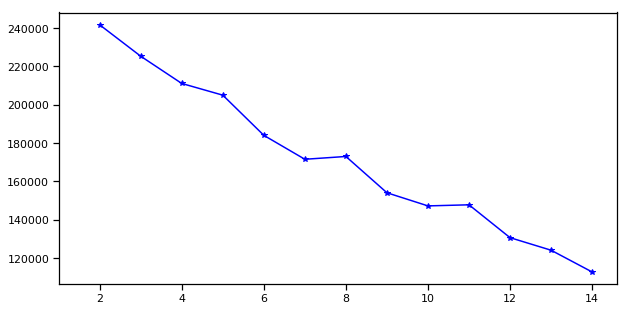

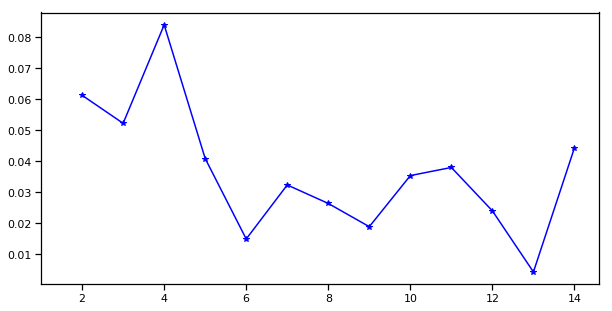

In [68]:
# Educated guessing - What are some criteria you could use?
# Rule of thumb
# The Elbow Method
# The Silhouette Approach
from sklearn import metrics
from sklearn.cluster import KMeans

# Rule of Thumb 
k = np.sqrt(38/2)
print(k)
 
# elbow
df_elbow = df_train_norm.copy()
elbow_score = []
for k in range(2,15):
#  Different initializations can result in different solutions
    k_means = KMeans(init='k-means++', n_clusters=k, n_init=2)
    k_means.fit(df_elbow)
    elbow_score.append(k_means.inertia_)

# sihouette
df_sihouette = df_train_norm.copy()
sihouette_score = []
for k in range(2,15):
    k_means = KMeans(init='k-means++', n_clusters=k, n_init=2)
    k_means.fit(df_sihouette)
    sihouette_score.append(metrics.silhouette_score(df_sihouette, k_means.labels_))

score = pd.DataFrame()
score['elbow'] = elbow_score
score['sihouette'] = sihouette_score

fig, ax = plt.subplots()
fig.set_size_inches(10,5)
plt.plot(range(2,15), score['elbow'], 'b*-')
plt.xlim(1, plt.xlim()[1])

fig, ax = plt.subplots()
fig.set_size_inches(10,5)
plt.plot(range(2,15), score['sihouette'], 'b*-')
plt.xlim(1, plt.xlim()[1])

### How many clusters?
From the above calculations and combined with the explained variance values provided by PCA method, I decided to select four clusters.

### Which clustering algorithm I selected?
I tried the kmeans and hierarchy clustering.

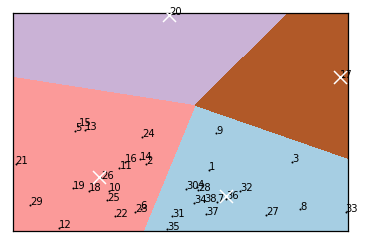

[[ 25.447378   -11.86556162]
 [-26.69625616   1.03688825]
 [  2.09591145 112.44518985]
 [ 72.52752965  69.56848096]]


In [69]:
df_reduced = skd.PCA(n_components=2).fit_transform(df_train_norm)
# .fit(df_train_norm.ix[:,:].T)
kmeans = KMeans(init='k-means++', n_clusters=4, n_init=1)
kmeans.fit(df_reduced)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].
# Plot the decision boundary. For that, we will assign a color to each

x_min, x_max = df_reduced[:, 0].min() - 1, df_reduced[:, 0].max() + 1
y_min, y_max = df_reduced[:, 1].min() - 1, df_reduced[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(df_reduced[:, 0], df_reduced[:, 1],'.k', markersize=2)

# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

for i, s in enumerate(df_train_norm.index):
    plt.annotate(s, xy=df_reduced[i,:2]+0.05, fontsize=10)
plt.show()
print(centroids)

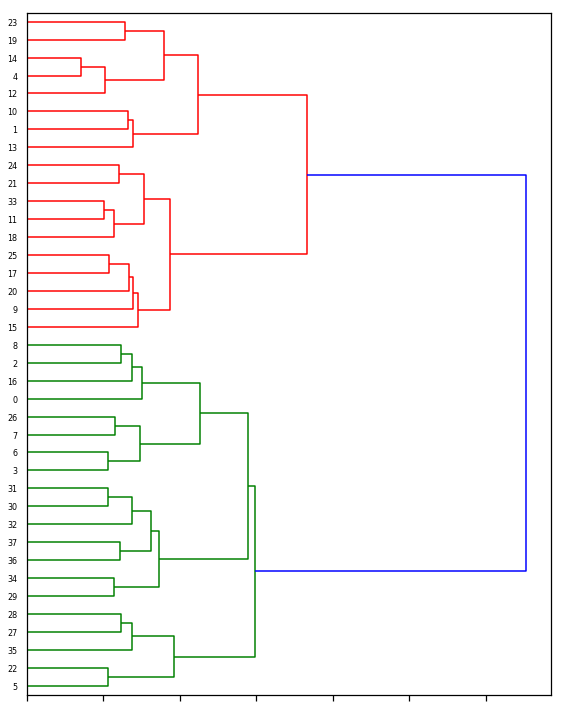

group one:  [6, 23, 28, 29, 36]
group two:  [30, 31, 32, 33, 35, 37, 38]
group three:  [1, 3, 4, 7, 8, 9, 17, 27]
group four:  [10, 12, 16, 18, 19, 21, 22, 25, 26, 34]
group five:  [2, 5, 11, 13, 14, 15, 20, 24]


In [91]:
### YOUR CODE HERE ###
from sklearn.metrics.pairwise import cosine_similarity
from scipy.cluster.hierarchy import single, complete, average, ward, dendrogram
dist = 1 - cosine_similarity(df_train_norm)
# Compare different loss/linkage functions 
# Ward
linkage_matrix_ward = ward(dist)
fig, ax = plt.subplots(figsize=(8, 10))
ax = dendrogram(linkage_matrix_ward, orientation="right");

plt.tick_params(axis='x', which='both', bottom='on', top='off', labelbottom='off')
plt.tight_layout()
plt.show()

from scipy.cluster.hierarchy import fcluster
fcluster = fcluster(linkage_matrix_ward, 5, criterion='maxclust')
i = 1
cluster_list = []
for cluster in fcluster:
    cluster_list.append((i,cluster))
    i +=1
one = []
two = []
three = []
four = []
five = []
for item in cluster_list:
    if item[-1] == 1:
        one.append(item[0])
    if item[-1] == 2:
        two.append(item[0])
    if item[-1] == 3:
        three.append(item[0])
    if item[-1] == 4:
        four.append(item[0])
    if item[-1] == 5:
        five.append(item[0])
print("group one: ", one)
print("group two: ", two)
print("group three: ", three)
print("group four: ", four)
print("group five: ", five)

In [92]:
one_cancer_type = []
two_cancer_type = []
three_cancer_type = []
four_cancer_type = []
five_cancer_type = []
for p in one:
    p = p-1
    one_cancer_type.append(df_label.iloc[p].cancer)
for p in two:
    p = p-1
    two_cancer_type.append(df_label.iloc[p].cancer)
for p in three:
    p = p-1
    three_cancer_type.append(df_label.iloc[p].cancer)
for p in four:
    p = p-1
    four_cancer_type.append(df_label.iloc[p].cancer)
for p in five:
    p = p-1
    five_cancer_type.append(df_label.iloc[p].cancer)
print("group one: ", one_cancer_type)
print("group two: ", two_cancer_type)
print("group three: ", three_cancer_type)
print("group four: ", four_cancer_type)
print("group five: ", five_cancer_type)


group one:  ['ALL', 'ALL', 'AML', 'AML', 'AML']
group two:  ['AML', 'AML', 'AML', 'AML', 'AML', 'AML', 'AML']
group three:  ['ALL', 'ALL', 'ALL', 'ALL', 'ALL', 'ALL', 'ALL', 'ALL']
group four:  ['ALL', 'ALL', 'ALL', 'ALL', 'ALL', 'ALL', 'ALL', 'ALL', 'ALL', 'AML']
group five:  ['ALL', 'ALL', 'ALL', 'ALL', 'ALL', 'ALL', 'ALL', 'ALL']


(YOUR INTERPRETATION HERE)
* How many clusters?
From the above calculations and combined with the explained variance values provided by PCA method, I decided to select four clusters.
* Which clustering algorithm I selected?
    * I tried the kmeans and hierarchy clustering.
    * Kmeans' result vs hierarchy's. I think hierarchy method gave me better clustering results.
    * For the number of clusters, I have tried four but the result wasn't good so then I tries five, which was better, as shown in the following:
        * group one:  ['ALL', 'ALL', 'AML', 'AML', 'AML']
        * group two:  ['AML', 'AML', 'AML', 'AML', 'AML', 'AML', 'AML']
        * group three:  ['ALL', 'ALL', 'ALL', 'ALL', 'ALL', 'ALL', 'ALL', 'ALL']
        * group four:  ['ALL', 'ALL', 'ALL', 'ALL', 'ALL', 'ALL', 'ALL', 'ALL', 'ALL', 'AML']
        * group five:  ['ALL', 'ALL', 'ALL', 'ALL', 'ALL', 'ALL', 'ALL', 'ALL']

## 4.2. Which clusters can you identify? What does your cluster analysis tell you about the data? (10 pts.)
- Visualize your results with the test data(5 pts.)
- Interprete your results (5 pts.)

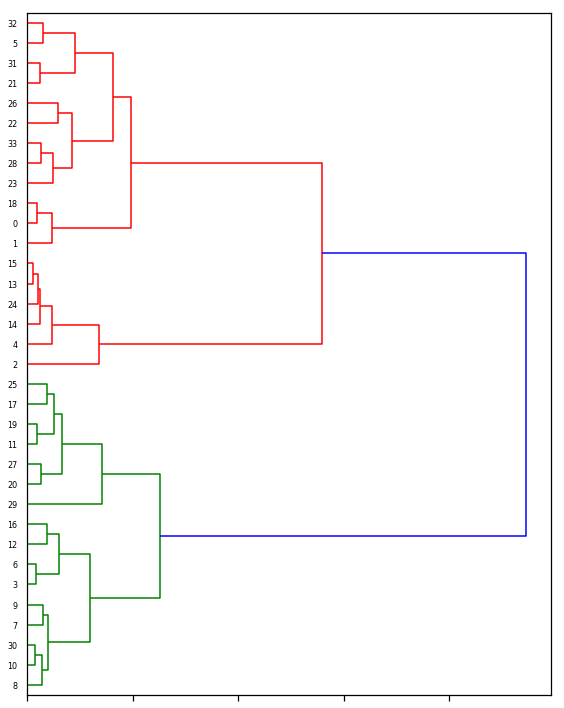

In [109]:
import sklearn.preprocessing as skp
df_test_norm = df_test.copy()
df_test_norm.ix[:,:] = skp.scale(df_test_norm.ix[:,:].astype(np.float))
df_test_norm.head()

train_PCA = skd.PCA(n_components=4).fit(df_train_norm)
df_test_reduced = train_PCA.transform(df_test_norm)

dist = 1 - cosine_similarity(df_test_reduced)
linkage_matrix_ward = ward(dist)
fig, ax = plt.subplots(figsize=(8, 10))
ax = dendrogram(linkage_matrix_ward, orientation="right");

plt.tick_params(axis='x', which='both', bottom='on', top='off', labelbottom='off')
plt.tight_layout()
plt.show()

In [111]:
from scipy.cluster.hierarchy import fcluster
fcluster = fcluster(linkage_matrix_ward, 5, criterion='maxclust')
print(fcluster)
i = 39
cluster_list = []
for cluster in fcluster:
    cluster_list.append((i,cluster))
    i +=1
one = []
two = []
three = []
four = []
five = []
for item in cluster_list:
    if item[-1] == 1:
        one.append(item[0])
    if item[-1] == 2:
        two.append(item[0])
    if item[-1] == 3:
        three.append(item[0])
    if item[-1] == 4:
        four.append(item[0])
    if item[-1] == 5:
        five.append(item[0])
print("group one: ", one)
print("group two: ", two)
print("group three: ", three)
print("group four: ", four)
print("group five: ", five)
one_cancer_type = []
two_cancer_type = []
three_cancer_type = []
four_cancer_type = []
five_cancer_type = []
for p in one:
    p = p-1
    one_cancer_type.append(df_label.iloc[p].cancer)
for p in two:
    p = p-1
    two_cancer_type.append(df_label.iloc[p].cancer)
for p in three:
    p = p-1
    three_cancer_type.append(df_label.iloc[p].cancer)
for p in four:
    p = p-1
    four_cancer_type.append(df_label.iloc[p].cancer)
for p in five:
    p = p-1
    five_cancer_type.append(df_label.iloc[p].cancer)
print("group one: ", one_cancer_type)
print("group two: ", two_cancer_type)
print("group three: ", three_cancer_type)
print("group four: ", four_cancer_type)
print("group five: ", five_cancer_type)

[4 4 3 1 3 5 1 1 1 1 1 2 1 3 3 3 1 2 4 2 2 5 5 5 3 2 5 2 5 2 1 5 5 5]
group one:  [42, 45, 46, 47, 48, 49, 51, 55, 69]
group two:  [50, 56, 58, 59, 64, 66, 68]
group three:  [41, 43, 52, 53, 54, 63]
group four:  [39, 40, 57]
group five:  [44, 60, 61, 62, 65, 67, 70, 71, 72]
group one:  ['ALL', 'ALL', 'ALL', 'ALL', 'ALL', 'ALL', 'AML', 'ALL', 'ALL']
group two:  ['AML', 'ALL', 'AML', 'ALL', 'AML', 'AML', 'ALL']
group three:  ['ALL', 'ALL', 'AML', 'AML', 'AML', 'AML']
group four:  ['ALL', 'ALL', 'AML']
group five:  ['ALL', 'AML', 'AML', 'AML', 'AML', 'ALL', 'ALL', 'ALL', 'ALL']


(YOUR INTERPRETATION HERE)
Compare with label!
#### From the last question, I got five clusters: group one and two mainly include "AML" type while group three, four and five contain mostly "ALL" type. 
* In the training dataset, the clusters I got as follow:
        * group one:  ['ALL', 'ALL', 'AML', 'AML', 'AML']
        * group two:  ['AML', 'AML', 'AML', 'AML', 'AML', 'AML', 'AML']
        * group three:  ['ALL', 'ALL', 'ALL', 'ALL', 'ALL', 'ALL', 'ALL', 'ALL']
        * group four:  ['ALL', 'ALL', 'ALL', 'ALL', 'ALL', 'ALL', 'ALL', 'ALL', 'ALL', 'AML']
        * group five:  ['ALL', 'ALL', 'ALL', 'ALL', 'ALL', 'ALL', 'ALL', 'ALL']
#### To figure out how this result works on my test data, I build a PCA model by fitting the training set and transform the test set by this model. Then I conduct the hierarchy clustering on my test set.
* In the test dataset, the cluster I got as follow:
        * group one:  ['ALL', 'ALL', 'ALL', 'ALL', 'ALL', 'ALL', 'AML', 'ALL', 'ALL']
        * group two:  ['AML', 'ALL', 'AML', 'ALL', 'AML', 'AML', 'ALL']
        * group three:  ['ALL', 'ALL', 'AML', 'AML', 'AML', 'AML']
        * group four:  ['ALL', 'ALL', 'AML']
        * group five:  ['ALL', 'AML', 'AML', 'AML', 'AML', 'ALL', 'ALL', 'ALL', 'ALL']
* I found the result is kind of messy. I also noticed that the situation where half "AML" and half  "ALL" show up in one group like the group one for training dataset and some clusters generated from test dataset are common, which made me think about the limitation of labels - simply dividing these patients into two different types might not comprehensively explain some gene similarities between them. We probably need a better classification method for these patients.